## A first look at neural network !

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras


Using TensorFlow backend.


### Load dataset

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
## Check data:
N, h, w = train_images.shape
print(f"Traing data: {N} images, size {w} x {h}")

Traing data: 60000 images, size 28 x 28


In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### Visualize data

In [5]:
print(train_images[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

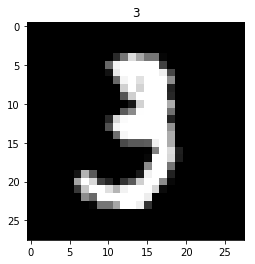

In [6]:
plt.imshow(train_images[10], cmap='gray')
plt.title(train_labels[10])
plt.show()

In [0]:
a = np.arange(12).reshape(3, 2, 2)

In [8]:
a

array([[[ 0,  1],
        [ 2,  3]],

       [[ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11]]])

In [9]:
a[0].flatten()

array([0, 1, 2, 3])

In [10]:
a.mean(axis=0)

array([[4., 5.],
       [6., 7.]])

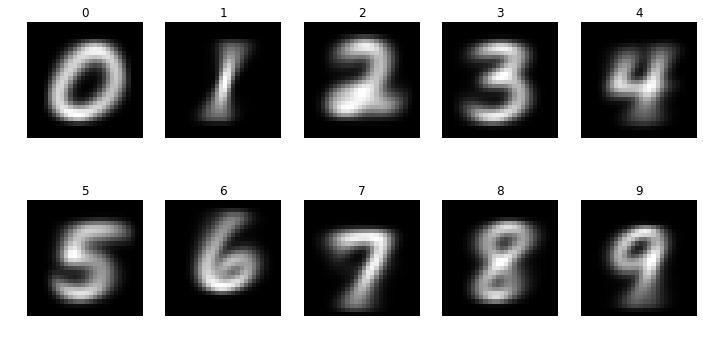

In [11]:
plt.figure(figsize=(12, 6))

index = 1
for i in set(train_labels):
  plt.subplot(2, 5, index)
  index += 1
  mask   = (train_labels == i)
  images = train_images[mask]
  avg = images.mean(axis=0)
  plt.title(str(i))
  plt.imshow(avg, cmap='gray')
  plt.axis('off')

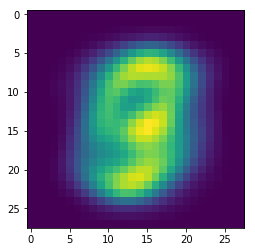

In [12]:
plt.imshow(train_images.mean(axis=0))

### Work flow

#### Prepare input

In [13]:
train_images[0].shape

(28, 28)

In [14]:
# 1: flatten each sample (2D matrix) to vector (1D)
train_images[0].flatten().shape

(784,)

In [15]:
print(train_images.shape)
X = train_images.reshape(N, w * h)
print(X.shape)

(60000, 28, 28)
(60000, 784)


In [0]:
# 2: Feature scaling to normalize each feature in range [0, 1] 
X = X / 255.

Question : Why we need feature scaling?

#### Build NN model

Input  : 28 * 28
Output : score of each images on 10 classes (or 10 outputs) 

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
net = Sequential()
net.add(Dense(256, activation='relu', input_shape=(h * w, )))
# net.add(Dense(2, activation='relu'))
net.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


#### Define loss function and optimizer

In [0]:
net.compile(
  optimizer='rmsprop', # sgd, adam, momentum, adadelta
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

#### Training

In [20]:
net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [21]:
net.fit(X, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.2886 - acc: 0.9192
Epoch 2/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.1241 - acc: 0.9638
Epoch 3/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.0848 - acc: 0.9752
Epoch 4/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.0632 - acc: 0.9812
Epoch 5/5
60000/60000 [==============================] - 1s 21us/step - loss: 0.0498 - acc: 0.9854


#### Evaluate

In [0]:
test_images = test_images.reshape(test_images.shape[0], h * w) / 255. # scale

In [23]:
test_loss, test_acc = net.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 36us/step


In [24]:
print(test_acc)

0.9777


In [0]:
predict_labels = net.predict(test_images)

In [26]:
print(predict_labels[:10].argmax(axis=1))

[7 2 1 0 4 1 4 9 6 9]


### Extra

In [0]:
net = Sequential()
net.add(Dense(256, activation='relu', input_shape=(h * w, )))
net.add(Dense(256, activation='relu'))
net.add(Dense(2, activation='relu', name='feature_embedding')) # <<<<<<<<<< Different
net.add(Dense(10, activation='softmax'))

In [28]:
net.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

net.fit(X, train_labels, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 2s 33us/step - loss: 1.3891 - acc: 0.4694
Epoch 2/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.9194 - acc: 0.6983
Epoch 3/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.7220 - acc: 0.7717
Epoch 4/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.5444 - acc: 0.8508
Epoch 5/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.4470 - acc: 0.8632
Epoch 6/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.3847 - acc: 0.8686
Epoch 7/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.3331 - acc: 0.8744
Epoch 8/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.3030 - acc: 0.8781
Epoch 9/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.2802 - acc: 0.8806
Epoch 10/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.1859 - acc: 0.9471

In [29]:
net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
feature_embedding (Dense)    (None, 2)                 514       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                30        
Total params: 267,296
Trainable params: 267,296
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.models import Model

In [0]:
vis_model = Model(inputs=net.input, outputs=net.get_layer("feature_embedding").output)

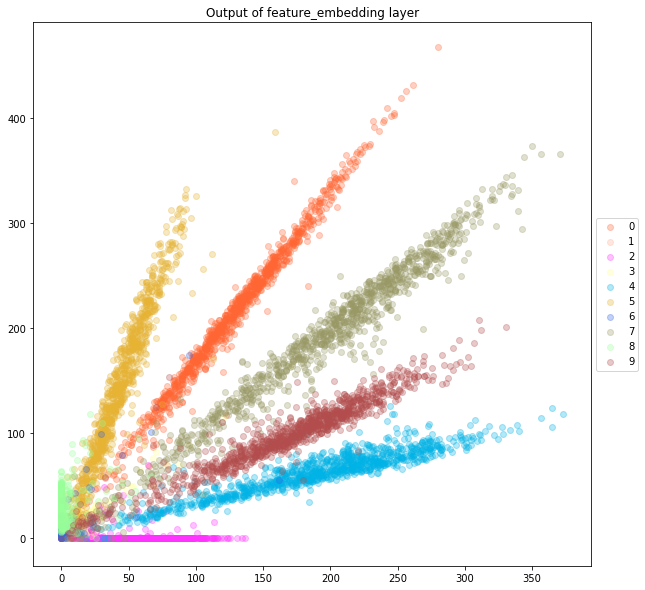

In [32]:
sample_colors = ['#FF6633', '#FFB399', '#FF33FF', '#FFFF99', '#00B3E6',
                 '#E6B333', '#3366E6', '#999966', '#99FF99', '#B34D4D',
                 '#80B300', '#809900', '#E6B3B3', '#6680B3', '#66991A']

plt.figure(figsize=(10, 10))

for i in set(test_labels):
  mask = (test_labels == i)
  data = test_images[mask]
  points = vis_model.predict(data)
  
  plt.scatter(points[:, 0], points[:, 1], c=sample_colors[i], label=str(i), alpha=0.3)
  
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Output of feature_embedding layer")
plt.show()